In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns

In [2]:
data_magic = pd.read_csv("MagicBricks_Cleaned_2019.csv")
data_magic.drop_duplicates(inplace=True)
data_magic.dropna(subset = ["PricePerSqft"], inplace=True)
data_magic.head()

,Unnamed: 0,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price_2019,Status,Transaction,Type,PricePerSqft
3,49,900.0,2,2.0,Semi-Furnished,Lajpat Nagar 2,1.0,15800000,Ready_to_move,New_Property,Builder_Floor,22000.0
4,56,850.0,2,2.0,Semi-Furnished,Lajpat Nagar 2,1.0,14600000,Ready_to_move,Resale,Builder_Floor,22000.0
8,123,1350.0,2,2.0,Furnished,Lajpat Nagar 2,4.0,12500000,Ready_to_move,Resale,Builder_Floor,9259.0
9,124,1500.0,3,3.0,Semi-Furnished,Lajpat Nagar 2,2.0,26000000,Ready_to_move,New_Property,Builder_Floor,9259.0
10,126,850.0,2,2.0,Semi-Furnished,Lajpat Nagar 2,2.0,14600000,Ready_to_move,Resale,Builder_Floor,9259.0


In [3]:
data_magic1 = pd.read_csv("MagicBricks_Cleaned_2020.csv")
data_magic1.drop_duplicates(inplace=True)
data_magic1.dropna(subset = ["PricePerSqft"], inplace=True)
data_magic1.head()

,Unnamed: 0,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price_2020,Status,Transaction,Type,PricePerSqft
0,52,1350.0,3,3,Semi-Furnished,Lajpat Nagar 2,1.0,22000000,Ready_to_move,Resale,Builder_Floor,15000.0
1,55,1350.0,3,3,Semi-Furnished,Lajpat Nagar 2,2.0,32500000,Ready_to_move,New_Property,Builder_Floor,24074.0
2,59,900.0,2,2,Semi-Furnished,Lajpat Nagar 2,1.0,13500000,Ready_to_move,Resale,Builder_Floor,15778.0
5,123,1350.0,3,3,Semi-Furnished,Lajpat Nagar 2,2.0,32500000,Ready_to_move,New_Property,Builder_Floor,24074.0
6,124,1800.0,3,3,Semi-Furnished,Lajpat Nagar 2,2.0,30000000,Ready_to_move,New_Property,Builder_Floor,16667.0


In [4]:
data_magic.drop(['BHK','Bathroom','Furnishing','Parking','Status','Transaction','Type'], axis=1, inplace=True)
data_magic1.drop(['BHK','Bathroom','Furnishing','Parking','Status','Transaction','Type'], axis=1, inplace=True)

In [5]:
data_magic.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
data_magic1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
data_magic.groupby('Locality').describe()

Area                                            \
                           count         mean         std     min      25%   
Locality                                                                     
Alaknanda                   36.0  1292.222222  240.702675   450.0  1200.00   
Chhattarpur                 15.0   985.333333  380.166630   500.0   737.50   
Commonwealth Games Village  26.0  2199.615385  583.299585  1250.0  1823.75   
Dilshad Garden              25.0   852.877840  430.498919   350.0   460.00   
Lajpat Nagar 2              27.0  1118.888889  339.935891   750.0   887.50   
Sarita Vihar                 3.0  1266.666667  202.072594  1150.0  1150.00   
Vasundhara Enclave          13.0  1276.923077  212.068567   780.0  1150.00   

                                                    Price_2019                \
                               50%      75%     max      count          mean   
Locality                                                                       
Alaknanda                   1360.0  1400.00  1600.0       36.0  1.666111e+07   
Chhattarpur                  900.0  1167.50  1750.0       15.0  8.294000e+06   
Commonwealth Games Village  2102.5  2518.75  3405.0       26.0  4.303462e+07   
Dilshad Garden               800.0  1000.00  1800.0       25.0  7.345200e+06   
Lajpat Nagar 2               900.0  1350.00  1800.0       27.0  1.850000e+07   
Sarita Vihar                1150.0  1325.00  1500.0        3.0  1.276667e+07   
Vasundhara Enclave          1350.0  1450.00  1500.0       13.0  1.162308e+07   

                            ...                         PricePerSqft  \
                            ...         75%         max        count   
Locality                    ...                                        
Alaknanda                   ...  19000000.0  21000000.0         36.0   
Chhattarpur                 ...   6750000.0  60000000.0         15.0   
Commonwealth Games Village  ...  43800000.0  71500000.0         26.0   
Dilshad Garden              ...   9200000.0  17000000.0         25.0   
Lajpat Nagar 2              ...  25250000.0  35000000.0         27.0   
Sarita Vihar                ...  13750000.0  14000000.0          3.0   
Vasundhara Enclave          ...  12500000.0  16500000.0         13.0   

                                                                         \
                                    mean          std      min      25%   
Locality                                                                  
Alaknanda                   12232.777778   436.995006  11538.0  11538.0   
Chhattarpur                  4138.000000     0.000000   4138.0   4138.0   
Commonwealth Games Village  19167.615385  1721.033087  16333.0  17619.0   
Dilshad Garden               8708.800000  1799.421273   5200.0   7666.0   
Lajpat Nagar 2              10576.703704  5501.963690   7000.0   7000.0   
Sarita Vihar                15384.000000     0.000000  15384.0  15384.0   
Vasundhara Enclave           9734.615385   151.292508   9655.0   9655.0   

                                                        
                                50%       75%      max  
Locality                                                
Alaknanda                   12500.0  12500.00  12500.0  
Chhattarpur                  4138.0   4138.00   4138.0  
Commonwealth Games Village  19355.5  20872.25  21311.0  
Dilshad Garden               8640.0   9375.00  12000.0  
Lajpat Nagar 2               7000.0  13883.00  22000.0  
Sarita Vihar                15384.0  15384.00  15384.0  
Vasundhara Enclave           9655.0   9655.00  10000.0  

[7 rows x 24 columns]

In [8]:
data_magic1.groupby('Locality').describe()

Area                                           \
                           count         mean         std     min     25%   
Locality                                                                    
Alaknanda                   48.0  1451.197958  454.896114   700.0  1237.5   
Chhattarpur                 23.0  1109.217391  445.726165   450.0   750.0   
Commonwealth Games Village  23.0  2210.478261  477.155956  1400.0  2021.5   
Dilshad Garden              26.0   799.344077  436.579208    80.0   527.5   
Lajpat Nagar 2              26.0   988.384615  351.730360     8.0   900.0   
Sarita Vihar                38.0  1336.842105  289.613958   850.0  1050.0   
Vasundhara Enclave          12.0  1237.500000  307.390039   800.0  1075.0   

                                                    Price_2020                \
                               50%      75%     max      count          mean   
Locality                                                                       
Alaknanda                   1375.0  1600.00  2880.0       48.0  1.932500e+07   
Chhattarpur                 1035.0  1300.00  2000.0       23.0  1.003696e+07   
Commonwealth Games Village  2100.0  2473.00  3400.0       23.0  4.113043e+07   
Dilshad Garden               775.0   933.75  1800.0       26.0  7.523077e+06   
Lajpat Nagar 2               900.0   997.50  1800.0       26.0  1.513846e+07   
Sarita Vihar                1400.0  1500.00  1950.0       38.0  1.471579e+07   
Vasundhara Enclave          1137.5  1400.00  2000.0       12.0  1.021333e+07   

                            ...                         PricePerSqft  \
                            ...         75%         max        count   
Locality                    ...                                        
Alaknanda                   ...  20250000.0  48000000.0         48.0   
Chhattarpur                 ...   6500000.0  65000000.0         23.0   
Commonwealth Games Village  ...  44500000.0  67000000.0         23.0   
Dilshad Garden              ...   9225000.0  17000000.0         26.0   
Lajpat Nagar 2              ...  15000000.0  32500000.0         26.0   
Sarita Vihar                ...  16950000.0  19000000.0         38.0   
Vasundhara Enclave          ...  11625000.0  12000000.0         12.0   

                                                                             \
                                     mean            std      min       25%   
Locality                                                                      
Alaknanda                    11394.750000    2297.686797   6250.0  10769.00   
Chhattarpur                   3858.652174      79.381478   3692.0   3845.00   
Commonwealth Games Village   17399.652174    3185.180723   5401.0  16666.50   
Dilshad Garden               10525.500000    4386.534233   4009.0   8640.00   
Lajpat Nagar 2              494831.769231  572174.937280   8889.0  12802.75   
Sarita Vihar                 11808.894737    3000.662231  11111.0  11111.00   
Vasundhara Enclave            8517.416667    1439.430219   4750.0   7879.25   

                                                           
                                50%        75%        max  
Locality                                                   
Alaknanda                   11875.0    12500.0    14583.0  
Chhattarpur                  3845.0     3845.0     4000.0  
Commonwealth Games Village  17619.0    19174.5    21052.0  
Dilshad Garden               9303.0     9883.5    18846.0  
Lajpat Nagar 2              20370.5  1150000.0  1150000.0  
Sarita Vihar                11111.0    11111.0    24371.0  
Vasundhara Enclave           9231.0     9565.0     9565.0  

[7 rows x 24 columns]

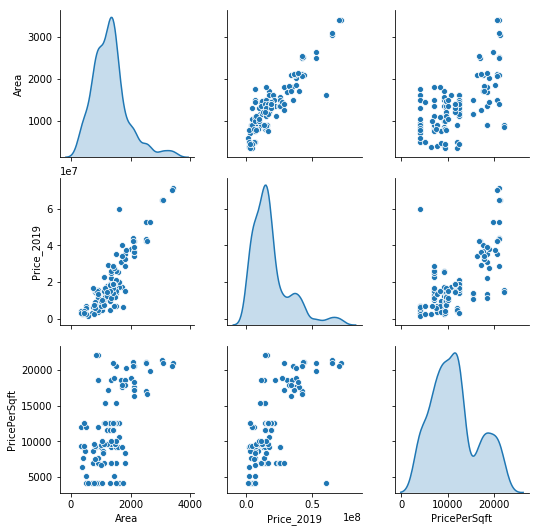

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.figure(figsize=(20,20))
g = sns.pairplot(data_magic, diag_kind="kde")
plt.show()

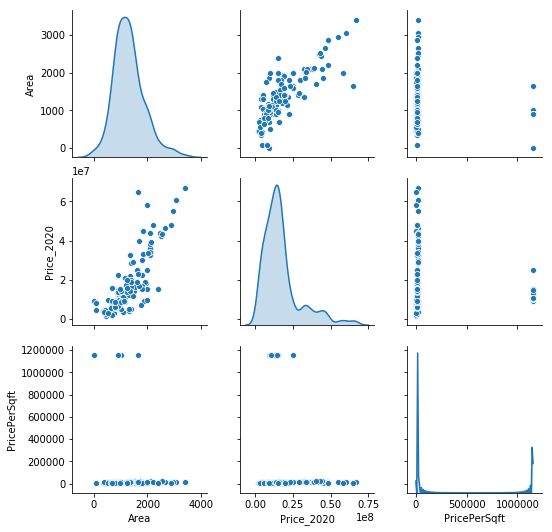

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.figure(figsize=(20,20))
g = sns.pairplot(data_magic1, diag_kind="kde")
plt.show()

Lajpat Nagar 2


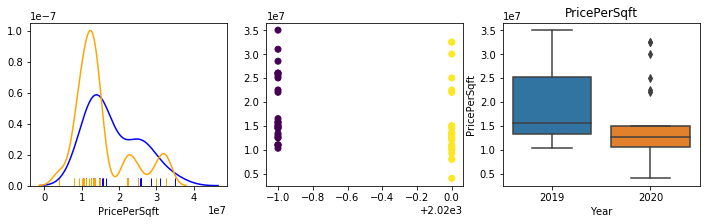

Commonwealth Games Village


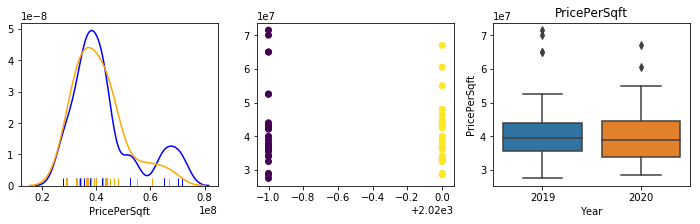

Alaknanda


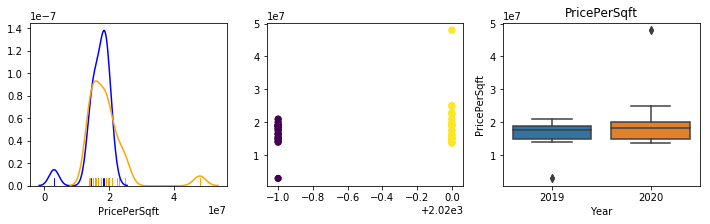

Sarita Vihar


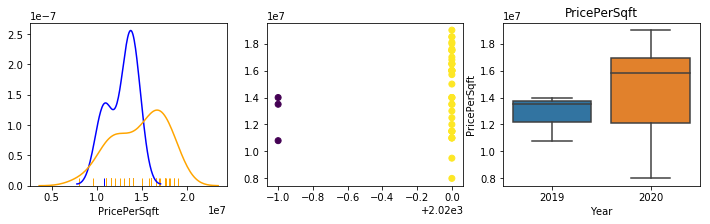

Chhattarpur


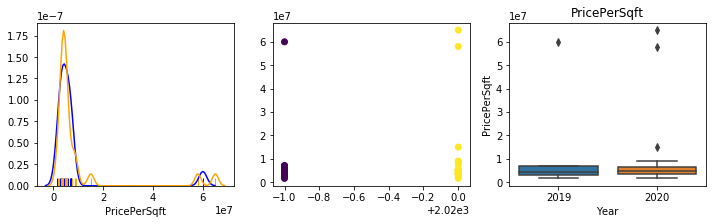

Dilshad Garden


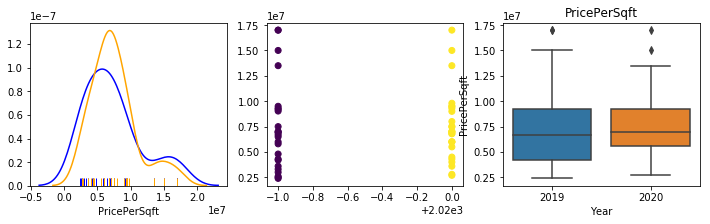

Vasundhara Enclave


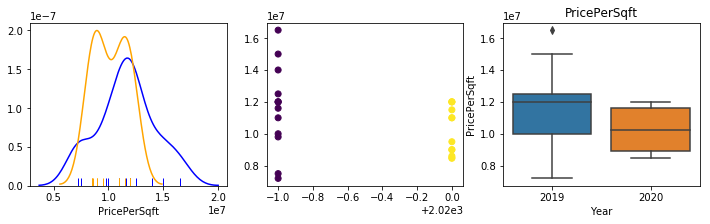

In [11]:
def printPairKdeAndBoxPlot(df, cols, hueVal):
    for col in cols:
        if(col != hueVal):   
            target_0 = df[df[hueVal]==2019]
            target_1 = df[df[hueVal]==2020]
            f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,3))
            sns.distplot(target_0[col], hist=False, rug=True, ax=ax1, color='blue')
            sns.distplot(target_1[col], hist=False, rug=True, ax=ax1, color='orange')
            ax2.scatter(df[hueVal], df[col], c=df[hueVal])
            sns.boxplot(x=hueVal, y=col, data=df, ax=ax3)
            plt.title(col)
            plt.show() 

areas = np.array(data_magic['Locality'].unique())
for area in areas:
    print(area)
    area_2019_data = pd.DataFrame(data_magic[data_magic['Locality']==area].reset_index()['Price_2019'])
    area_2019_data.columns = ['PricePerSqft']
    area_2019_data['Year'] = 2019
    area_2020_data = pd.DataFrame(data_magic1[data_magic1['Locality']==area].reset_index()['Price_2020'])
    area_2020_data.columns = ['PricePerSqft']
    area_2020_data['Year'] = 2020
    area_data = pd.concat([area_2019_data, area_2020_data])
    printPairKdeAndBoxPlot(area_data, ['PricePerSqft'], 'Year')

In [12]:
from scipy.stats import ttest_ind

for area in areas:
    data_2019 = data_magic[data_magic['Locality']==area]['PricePerSqft']
    data_2020 = data_magic1[data_magic1['Locality']==area]['PricePerSqft']

    #Calculate the T-test and P-Value for TWO INDEPENDENTsamples
    tstat, pval = ttest_ind(data_2019, data_2020) 
    if pval < 0.05:
        if tstat < 0:
            state = 'increased'
        else:
            state = 'decreased'
        print(area, state, ':There is a significant difference between prices between 2019 & 2020')
        print('        P Values & T Statistic', pval, tstat)
    else:
        print(area, ':There is a significant no difference between prices between 2019 & 2020')
        print('        P Values & T Statistic', pval, tstat)

Lajpat Nagar 2 increased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 5.548947445614156e-05 -4.39916413429441
Commonwealth Games Village decreased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.017803841440483848 2.455929271417343
Alaknanda decreased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.033998995917489006 2.1561849466551046
Sarita Vihar decreased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.04819657249884306 2.0396876215907422
Chhattarpur decreased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 1.018505712580801e-15 13.563874946076087
Dilshad Garden :There is a significant no difference between prices between 2019 & 2020
        P Values & T Statistic 0.06060778295286356 -1.920628078651151
Vasundhara 

In [16]:
area_names = []
price_2019=[]
price_2020=[]
result = pd.DataFrame()
for area in areas:
    data_2019 = data_magic[data_magic['Locality']==area]['PricePerSqft']
    data_2020 = data_magic1[data_magic1['Locality']==area]['PricePerSqft']
    area_names.append(area)
    price_2019.append(data_2019.median())
    price_2020.append(data_2020.median())

result['Area'] = area_names
result['price_2019'] = price_2019
result['price_2020'] = price_2020
result['Diff'] = ((result['price_2020']-result['price_2019'])/result['price_2019'])*100
result

,Area,price_2019,price_2020,Diff
0,Lajpat Nagar 2,7000.0,20370.5,191.007143
1,Commonwealth Games Village,19355.5,17619.0,-8.971610
2,Alaknanda,12500.0,11875.0,-5.000000
3,Sarita Vihar,15384.0,11111.0,-27.775611
4,Chhattarpur,4138.0,3845.0,-7.080715
5,Dilshad Garden,8640.0,9303.0,7.673611
6,Vasundhara Enclave,9655.0,9231.0,-4.391507
